In [240]:
from env import user, host, password, get_db_url
import seaborn as sns
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import random
import math
import datetime
from pydataset import data 
from skimpy import clean_columns

In [241]:
data('iris', show_doc=True)
iris_db = data('iris')

iris

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

## Edgar Anderson's Iris Data

### Description

This famous (Fisher's or Anderson's) iris data set gives the measurements in
centimeters of the variables sepal length and width and petal length and
width, respectively, for 50 flowers from each of 3 species of iris. The
species are _Iris setosa_, _versicolor_, and _virginica_.

### Usage

    iris
    iris3

### Format

`iris` is a data frame with 150 cases (rows) and 5 variables (columns) named
`Sepal.Length`, `Sepal.Width`, `Petal.Length`, `Petal.Width`, and `Species`.

`iris3` gives the same data arranged as a 3-dimensional array of size 50 by 4
by 3, as represented by S-PLUS. The first dimension gives the case number
within the species subsample, the second the measurements with names `Sepal
L.`, `Sepal W.`, `Petal L.`, and `Petal W.`, and the third the species.

### Source

Fisher, R. A. (1936) The use of multiple measurements in taxonomi

In [242]:
# conducting data familiarization/exploration
iris_db.describe()
iris_db.info
iris_db.dtypes

Sepal.Length    float64
Sepal.Width     float64
Petal.Length    float64
Petal.Width     float64
Species          object
dtype: object

In [243]:
# i want to first start by cleaning the column names to 'snake_case' format 
# i've installed the 'skimpy' module and will use the 'clean_columns' method to clean the iris dataframe column names

iris_db = clean_columns(iris_db, case = 'snake')
iris_db.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

<AxesSubplot:xlabel='petal_length', ylabel='Count'>

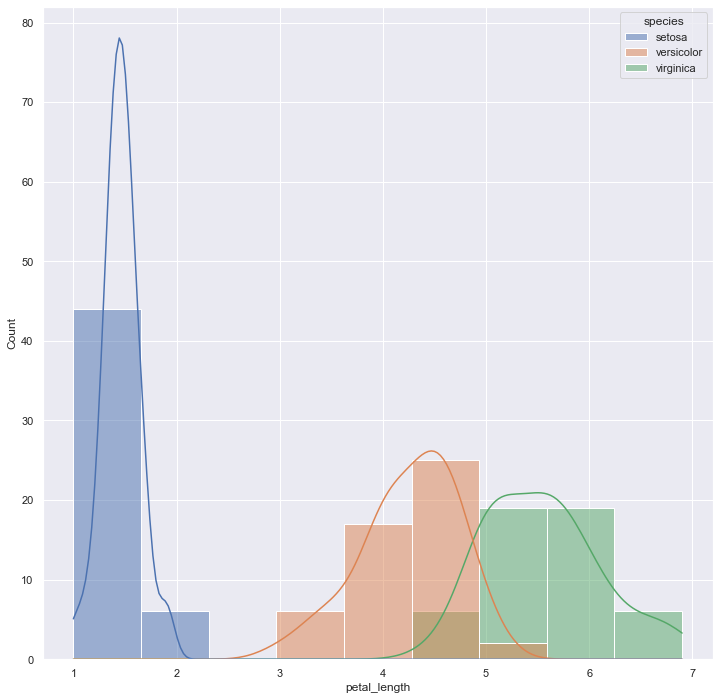

In [244]:
# 1. What does the distribution of petal lengths look like?
plt.figure(figsize= (12, 12)) 

sns.set_theme()
sns.histplot(data = iris_db, x = 'petal_length', kde=True, hue='species')

<AxesSubplot:xlabel='petal_length', ylabel='Count'>

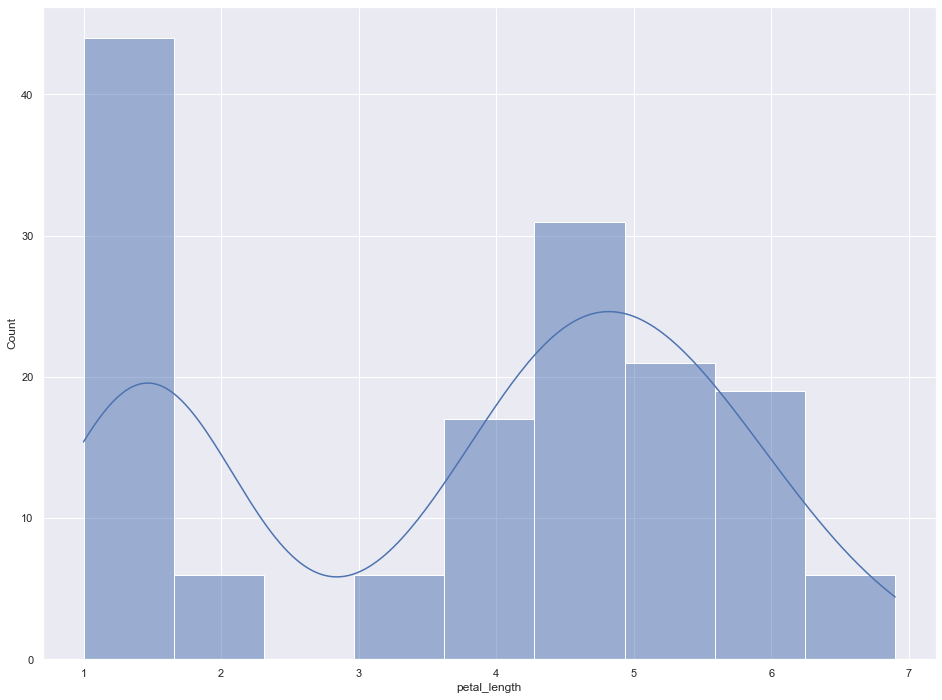

In [245]:
sns.histplot(data = iris_db, x = 'petal_length', kde=True)

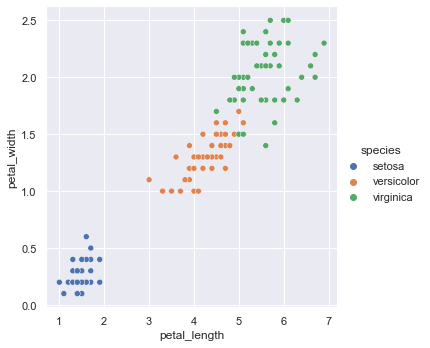

In [246]:
# 2. Is there a correlation between petal length and petal width? 
# Use http://guessthecorrelation.com/ as a hint to how we could visually determine if a correlation exists between two numeric columns

# at a quick glance, there appears to be a (positive) correlation between petal_width and petal_length
# in other words, as the petal length increases, there's a good chance that the width of the petal will also increase
# the same can be said about the increase in petal width and increasing length

sns.relplot(x = 'petal_length', y = 'petal_width', data = iris_db, hue='species')

# sns.set(rc ={'figure.figsize':(10, 10)})

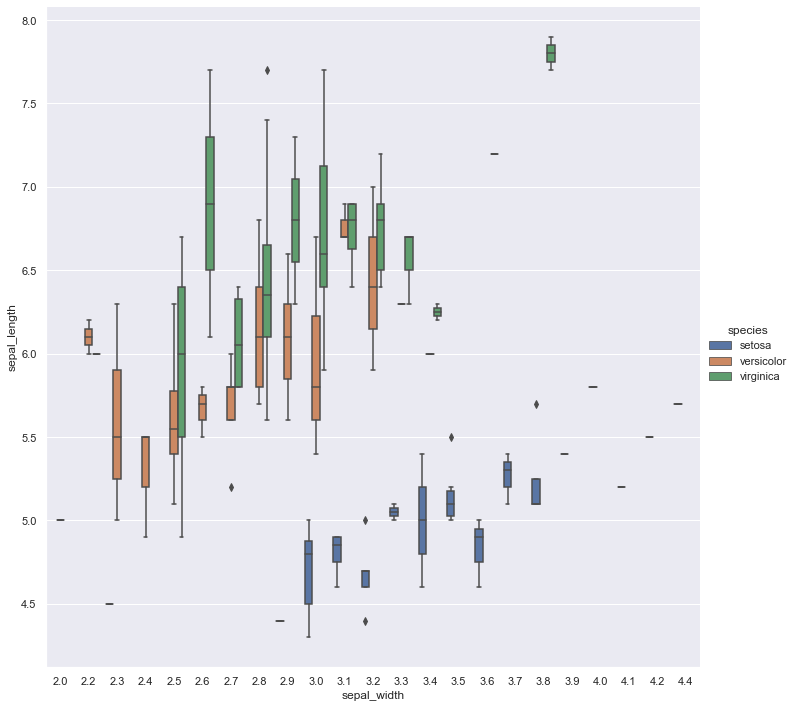

In [247]:
# 3. Would it be reasonable to predict species based on sepal width and sepal length? 
# For this, you'll visualize two numeric columns through the lense of a categorical column

# yes, with more applied statistical methods one could potentially predict the correct flower species based on the sepal length and width 

sns.catplot(data=iris_db, x='sepal_width', y='sepal_length', hue='species', kind='box', height=10)

In [248]:
iris_db.head()

,sepal_length,sepal_width,petal_length,petal_width,species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa


In [249]:
# 4. Which features would be best used to predict species?

# petal length and petal width

iris_db.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


In [250]:
labels = pd.Series(iris_db.columns)
labels = labels.drop(index=4)
labels

0    sepal_length
1     sepal_width
2    petal_length
3     petal_width
dtype: object

<AxesSubplot:>

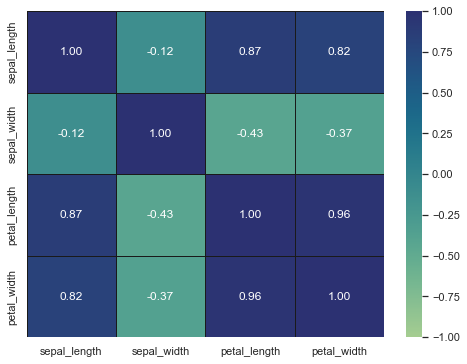

In [251]:
fig, ax = plt.subplots(figsize=(8,6)) 
sns.heatmap(iris_db.corr(), cmap = 'crest', annot = True, fmt = '0.2f',
           vmin = -1, vmax = 1, center = 0,
           xticklabels = labels,
           yticklabels = labels, linewidth = 1, linecolor = 'k')

In [252]:
# Excersises Part 2

# 1. Using the lesson as an example, use seaborn's load_dataset function to load the anscombe data set. 
# Use pandas to group the data by the dataset column, and calculate summary statistics for each dataset. 
# What do you notice?

# the summary statistics for all four (4) unique datasets are similar (count, mean, std, quantiles)

anscombe_db = sns.load_dataset('anscombe')
anscombe_db.head()
anscombe_db.groupby('dataset').describe()


x                                               y            \
        count mean       std  min  25%  50%   75%   max count      mean   
dataset                                                                   
I        11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500909   
II       11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500909   
III      11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500000   
IV       11.0  9.0  3.316625  8.0  8.0  8.0   8.0  19.0  11.0  7.500909   

                                                   
              std   min    25%   50%   75%    max  
dataset                                            
I        2.031568  4.26  6.315  7.58  8.57  10.84  
II       2.031657  3.10  6.695  8.14  8.95   9.26  
III      2.030424  5.39  6.250  7.11  7.98  12.74  
IV       2.030579  5.25  6.170  7.04  8.19  12.50

In [253]:
anscombe_db.groupby('dataset')[['x', 'y']].agg(['mean', 'median', 'std'])

x                          y                 
        mean median       std      mean median       std
dataset                                                 
I        9.0    9.0  3.316625  7.500909   7.58  2.031568
II       9.0    9.0  3.316625  7.500909   8.14  2.031657
III      9.0    9.0  3.316625  7.500000   7.11  2.030424
IV       9.0    8.0  3.316625  7.500909   7.04  2.030579

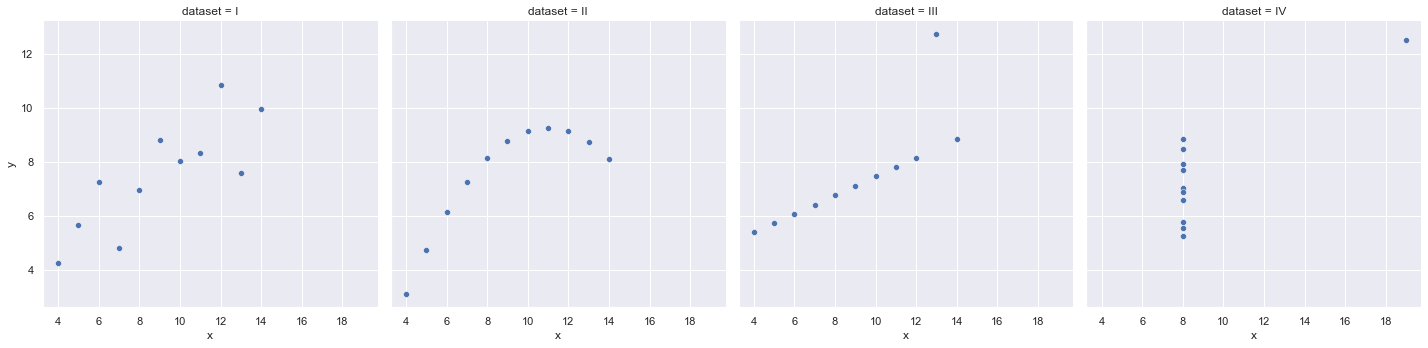

In [254]:
# 1. continued

# Plot the x and y values from the anscombe data. 
# Each dataset should be in a separate column.


sns.relplot(data=anscombe_db, x='x', y='y', col='dataset')

In [255]:
# 2. Load the InsectSprays dataset and read it's documentation. 

data('InsectSprays', show_doc=True)

insect_spray_db = data('InsectSprays')


InsectSprays

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

## Effectiveness of Insect Sprays

### Description

The counts of insects in agricultural experimental units treated with
different insecticides.

### Usage

    InsectSprays

### Format

A data frame with 72 observations on 2 variables.

[,1]

count

numeric

Insect count

[,2]

spray

factor

The type of spray

### Source

Beall, G., (1942) The Transformation of data from entomological field
experiments, _Biometrika_, **29**, 243–262.

### References

McNeil, D. (1977) _Interactive Data Analysis_. New York: Wiley.

### Examples

    require(stats); require(graphics)
    boxplot(count ~ spray, data = InsectSprays,
            xlab = "Type of spray", ylab = "Insect count",
            main = "InsectSprays data", varwidth = TRUE, col = "lightgray")
    fm1 <- aov(count ~ spray, data = InsectSprays)
    summary(fm1)
    opar <- par(mfrow = c(2, 2), oma = c(0, 0, 1.1, 0))
    plot(fm1)
 

In [256]:
# 2. continued: Create a boxplot that shows the effectiveness of the different insect sprays.

insect_spray_db.head()


,count,spray
1,10,A
2,7,A
3,20,A
4,14,A
5,14,A


<AxesSubplot:xlabel='spray', ylabel='count'>

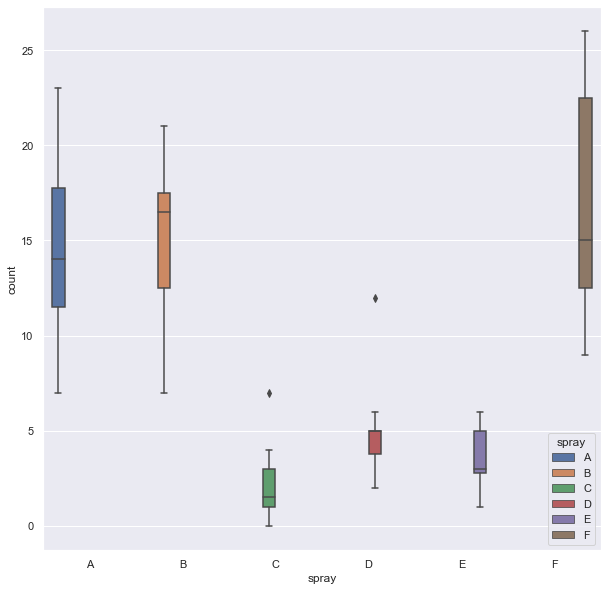

In [257]:
plt.figure(figsize=(10, 10))
sns.boxplot(x = 'spray', y = 'count', data = insect_spray_db, hue='spray')

In [258]:
# 3. Load the swiss dataset and read it's documentation. 
# The swiss dataset is available from pydatset rather than seaborn. Create visualizations to answer the following questions:


# What measure correlates most strongly with fertility?

data('swiss', show_doc=True)

swiss

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

## Swiss Fertility and Socioeconomic Indicators (1888) Data

### Description

Standardized fertility measure and socio-economic indicators for each of 47
French-speaking provinces of Switzerland at about 1888.

### Usage

    data(swiss)

### Format

A data frame with 47 observations on 6 variables, each of which is in percent,
i.e., in [0,100].

[,1] Fertility Ig, "common standardized fertility measure" [,2] Agriculture
[,3] Examination nation [,4] Education [,5] Catholic [,6] Infant.Mortality
live births who live less than 1 year.

All variables but 'Fert' give proportions of the population.

### Source

Project "16P5", pages 549-551 in

Mosteller, F. and Tukey, J. W. (1977) “Data Analysis and Regression: A Second
Course in Statistics”. Addison-Wesley, Reading Mass.

indicating their source as "Data used by permission of Franice van de Walle.
Office of Population Research, Princeton Univer

In [259]:
swiss_db = data('swiss')
swiss_db.head()
swiss_db['Catholic'].mean()

41.14382978723404

In [260]:
# Create an attribute named is_catholic that holds a boolean value of whether or not the province is Catholic. 
# (Choose a cutoff point for what constitutes catholic)

swiss_db = clean_columns(swiss_db, 'snake')
swiss_db['is_catholic'] = swiss_db['catholic'] > 50 # where 41.14 = dataset mean
swiss_db.head()

,fertility,agriculture,examination,education,catholic,infant_mortality,is_catholic
Courtelary,80.2,17.0,15,12,9.96,22.2,False
Delemont,83.1,45.1,6,9,84.84,22.2,True
Franches-Mnt,92.5,39.7,5,5,93.40,20.2,True
Moutier,85.8,36.5,12,7,33.77,20.3,False
Neuveville,76.9,43.5,17,15,5.16,20.6,False


In [261]:
# What measure correlates most strongly with fertility?

# education (negatively) @ -0.66
# catholic (positively) @ 0.46 

swiss_db.corr()

,fertility,agriculture,examination,education,catholic,infant_mortality,is_catholic
fertility,1.000000,0.353079,-0.645883,-0.663789,0.463685,0.416556,0.402813
agriculture,0.353079,1.000000,-0.686542,-0.639523,0.401095,-0.060859,0.410503
examination,-0.645883,-0.686542,1.000000,0.698415,-0.572742,-0.114022,-0.597861
education,-0.663789,-0.639523,0.698415,1.000000,-0.153859,-0.099322,-0.154677
catholic,0.463685,0.401095,-0.572742,-0.153859,1.000000,0.175496,0.961723
infant_mortality,0.416556,-0.060859,-0.114022,-0.099322,0.175496,1.000000,0.166081
is_catholic,0.402813,0.410503,-0.597861,-0.154677,0.961723,0.166081,1.000000


<AxesSubplot:xlabel='fertility', ylabel='is_catholic'>

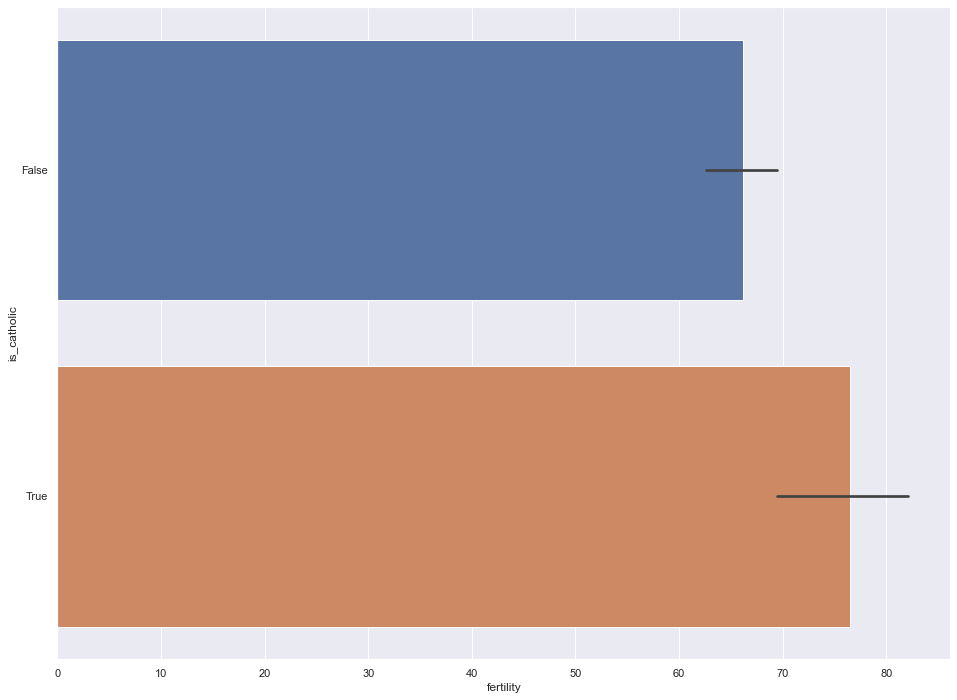

In [262]:
# Does whether or not a province is Catholic influence fertility?

sns.barplot(data=swiss_db, x='fertility', y='is_catholic', orient='h')

In [263]:
# Load the sleepstudy data and read it's documentation. Use seaborn to create a line chart of all the individual subject's reaction times and a more prominant line showing the average change in reaction time.

In [264]:
# 4. Using the chipotle dataset from the previous exercise
# create a bar chart that shows the 4 most popular items and the revenue produced by each

url = get_db_url(user, password, host, 'chipotle')
chipotle_table = pd.read_sql('SELECT * FROM orders', url)
chipotle_table.head()

,id,order_id,quantity,item_name,choice_description,item_price
0,1,1,1,Chips and Fresh Tomato Salsa,nan,$2.39
1,2,1,1,Izze,[Clementine],$3.39
2,3,1,1,Nantucket Nectar,[Apple],$3.39
3,4,1,1,Chips and Tomatillo-Green Chili Salsa,nan,$2.39
4,5,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans, Rice, Cheese, Sour Cream]]",$16.98


In [265]:
chipotle_table.item_price = chipotle_table.item_price.str.replace('$', '').astype('float')

/var/folders/rh/x31f4b0x1p983mw3qx5b0zsh0000gn/T/ipykernel_13803/1139264335.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  chipotle_table.item_price = chipotle_table.item_price.str.replace('$', '').astype('float')


In [266]:
chipotle_table.head()
chipotle_table.dtypes

id                      int64
order_id                int64
quantity                int64
item_name              object
choice_description     object
item_price            float64
dtype: object

In [267]:
revenue_table = pd.pivot_table(chipotle_table, index=['item_name'], values=['item_price'], aggfunc='sum')
revenue_table = revenue_table.rename(index={'item_name': 'menu_item'}, columns={'item_price': 'total_revenue'})
top_4_revenue = revenue_table.nlargest(columns='total_revenue', n=4, keep='all')
top_4_revenue.head()

,total_revenue
item_name,
Chicken Bowl,7342.73
Chicken Burrito,5575.82
Steak Burrito,3851.43
Steak Bowl,2260.19


In [268]:
top_4_revenue = top_4_revenue.reset_index(level=0)

Text(0, 0.5, 'Menu Item')

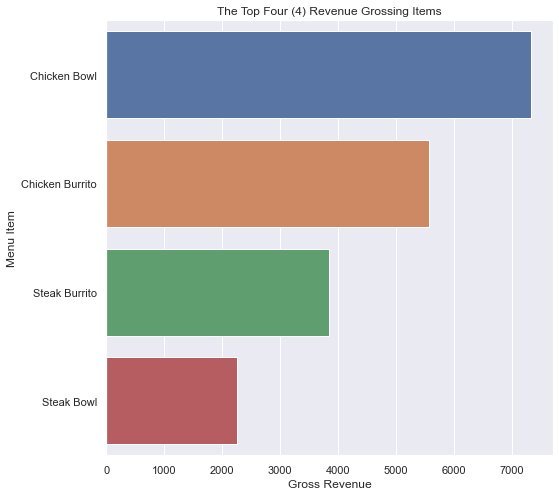

In [269]:
plt.figure(figsize=(8, 8))
sns.barplot(x='total_revenue', y='item_name', data=top_4_revenue)

plt.title('The Top Four (4) Revenue Grossing Items')
plt.xlabel('Gross Revenue')
plt.ylabel('Menu Item')


In [270]:
# 5. Load the sleepstudy data and read it's documentation.
# Use seaborn to create a line chart of all the individual subject's reaction times 
# and a more prominant line showing the average change in reaction time

data('sleepstudy', show_doc=True)


sleepstudy

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

## Reaction times in a sleep deprivation study

### Description

The average reaction time per day for subjects in a sleep deprivation study.
On day 0 the subjects had their normal amount of sleep. Starting that night
they were restricted to 3 hours of sleep per night. The observations represent
the average reaction time on a series of tests given each day to each subject.

### Format

A data frame with 180 observations on the following 3 variables.

`Reaction`

Average reaction time (ms)

`Days`

Number of days of sleep deprivation

`Subject`

Subject number on which the observation was made.

### Details

These data are from the study described in Belenky et al. (2003), for the
sleep-deprived group and for the first 10 days of the study, up to the
recovery period.

### References

Gregory Belenky, Nancy J. Wesensten, David R. Thorne, Maria L. Thomas, Helen
C. Sing, Daniel P. Redmond, 

In [271]:
sleepstudy_db = data('sleepstudy')
sleepstudy_db.head()
sleepstudy_db.shape
sleepstudy_db.Subject.nunique() # there are 18 unique 'subjects' - possibly those who participated in the study

18

In [272]:
sleepstudy_db.head()
sleepstudy_db.Days.nunique()
sleepstudy_db['Subject'] = 'Subject_' + sleepstudy_db.Subject.astype(str) # converting the 'Subject' column and values to str type and also including the 'Subject_' in front of ea. value for clarity
sleepstudy_db.head()

,Reaction,Days,Subject
1,249.5600,0,Subject_308
2,258.7047,1,Subject_308
3,250.8006,2,Subject_308
4,321.4398,3,Subject_308
5,356.8519,4,Subject_308


<AxesSubplot:xlabel='Days', ylabel='Reaction'>

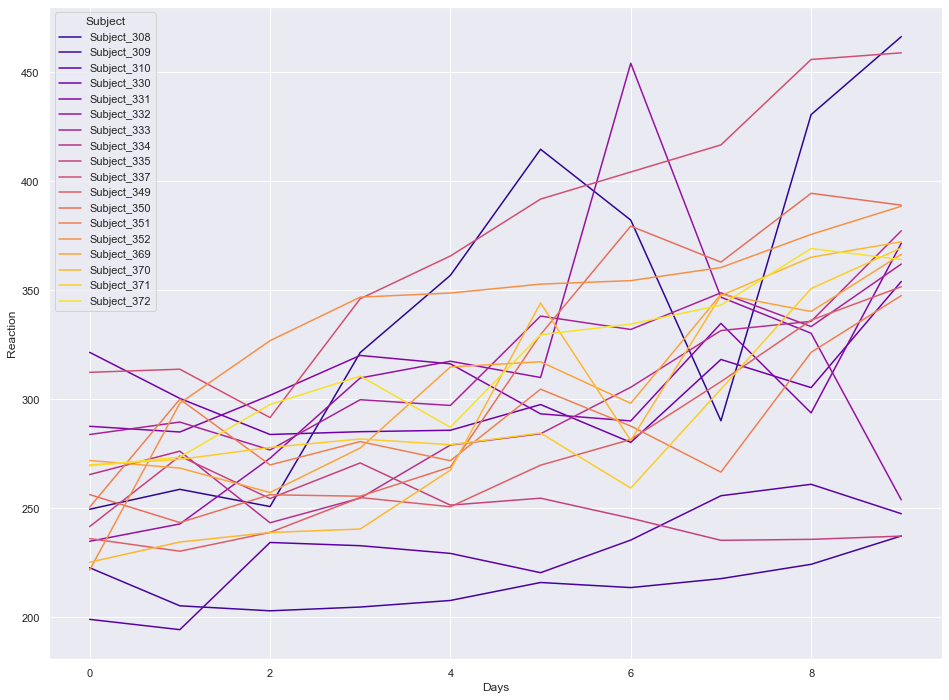

In [273]:
sns.lineplot(data=sleepstudy_db, x='Days', y='Reaction', hue='Subject', palette='plasma') # where 'ax' denotes axes

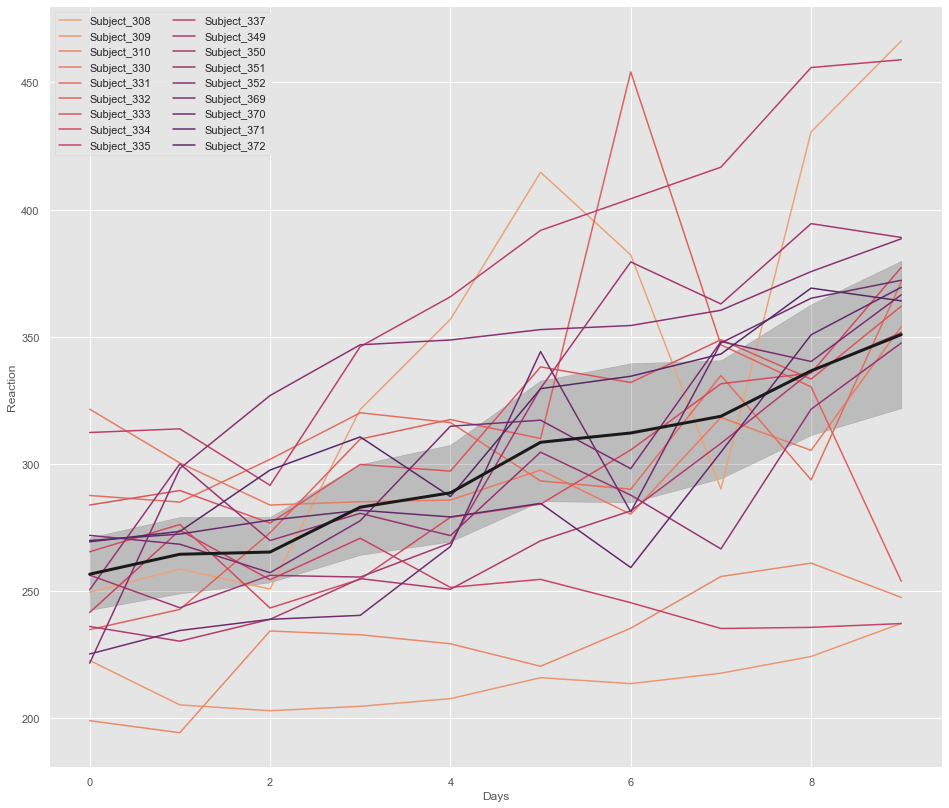

In [274]:
plt.figure(figsize=(16, 14))
plt.style.use('ggplot')

sns.lineplot(data=sleepstudy_db, x='Days', y='Reaction', hue='Subject', palette='flare')
sns.lineplot(data=sleepstudy_db, x='Days', y='Reaction', color='k', lw=3)

plt.legend(labels=sleepstudy_db.Subject.unique(), ncol=2) 